# ThinkStats Chapter 2

In [82]:
# Exercise 2.4 Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 
# Compute Cohen’s d to quantify the difference between the groups. 
# How does it compare to the difference in pregnancy length?

import matplotlib.pyplot as plt
from statistics import mean, stdev
from math import sqrt
import pandas as pd
import numpy as np

import thinkstats2
import nsfg

%matplotlib inline

df = nsfg.ReadFemPreg()
df.head(20)


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


In [83]:
import math
# Clean up the 2 series and output an array
c0 = df.totalwgt_lb[df.pregordr==1].dropna().tolist()
c1 = df.totalwgt_lb[df.pregordr!=1].dropna().tolist()

cohens_d = (mean(c0) - mean(c1)) / (sqrt((stdev(c0) ** 2 + stdev(c1) ** 2) / 2))

print("cohens_d function from stackoverflow: {0}".format(cohens_d))

group1 = df.totalwgt_lb[df.pregordr==1].dropna()
group2 = df.totalwgt_lb[df.pregordr!=1].dropna()

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1,n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d


print("cohens_d function from thinkstats: {0}".format(CohenEffectSize(group1,group1)))
                                

                                 

cohens_d function from stackoverflow: -0.06904986139204121
cohens_d function from thinkstats: 0.0


### 2.4: Looks like no difference in  birth weight  b/w firstborn babies and subsequent babies

In [84]:
df['birthwgt_lb'].value_counts().sort_index()

0        8
1       40
2       53
3       98
4      229
5      697
6     2223
7     3049
8     1889
9      623
10     132
11      26
12      10
13       3
14       3
15       1
Name: birthwgt_lb, dtype: int64

# ThinkStats Chapter 3
Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

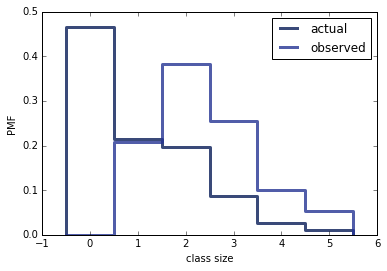

pmf mean 1.02420515504
biased mean 2.40367910066


In [85]:
import chap01soln
import thinkplot
import math
import numpy as np
import nsfg
import thinkstats2


def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf



#resp = chap01soln.ReadFemResp()
ts = resp.numkdhh
pmf = thinkstats2.Pmf(ts, label='actual')
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

print('pmf mean', pmf.Mean())
print('biased mean', biased_pmf.Mean())

# 4.2 A Random Distribution
Exercise 4.2 The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?


>Answer: Yes, The distribution does appear uniform

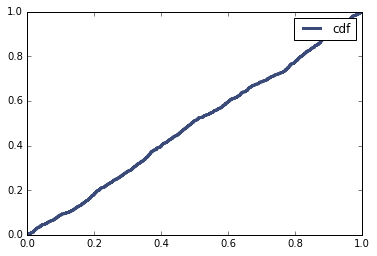

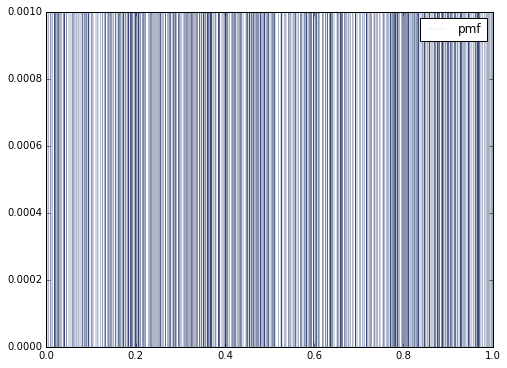

In [86]:
import random
import thinkstats2

t = [random.random() for _ in range(1000)]

cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf, label='cdf')
thinkplot.Show()

pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=".1",label='pmf')
thinkplot.Show()

# Chapter 5 Ex1: Blue Man Group
Exercise 5.1 In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf

In [93]:
#from __future__ import print_function, division
import scipy.stats
%matplotlib inline
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
#type(dist)
#dist.mean(), dist.std()
#dist.cdf(mu - sigma) # 16% are more than 1 std dev from the mean

# How many b/w 5'10 and 6'1
low = dist.cdf(177.8)    # 5'10" -> in x 2.54 = cm
high = dist.cdf(185.4)   # 6'1"  -> 185.4 cm

print("low: {0}, high: {1}, diff: {2}".format(low, high, high-low))




low: 0.48963902786483265, high: 0.8317337108107857, diff: 0.3420946829459531


# Chapter 6 Ex1: Household Income
Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households reports a taxable income below the mean? How do the results depend on the assumed upper bound?

In [112]:
import numpy as np

import density
import hinc
import thinkplot
import thinkstats2

def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

def main(log_upper=6.0):
    df = hinc.ReadData()
    log_sample = InterpolateSample(df, log_upper)

    log_cdf = thinkstats2.Cdf(log_sample)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='CDF')

    sample = np.power(10, log_sample)
    mean, median = density.Summarize(sample)

    cdf = thinkstats2.Cdf(sample)
    print('cdf[mean]', cdf[mean])

    pdf = thinkstats2.EstimatedPdf(sample)
    thinkplot.Pdf(pdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='PDF')

/Users/robert/ds/metis/prework/ThinkStats2/code/hinc.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[0][0] -= 1
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.


with log-upper 6


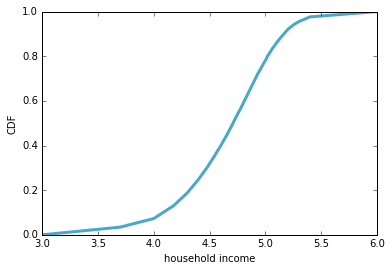

mean 74278.7075312
std 93946.9299635
median 51226.4544789
skewness 4.94992024443
pearson skewness 0.736125801914
cdf[mean] 0.660005879567


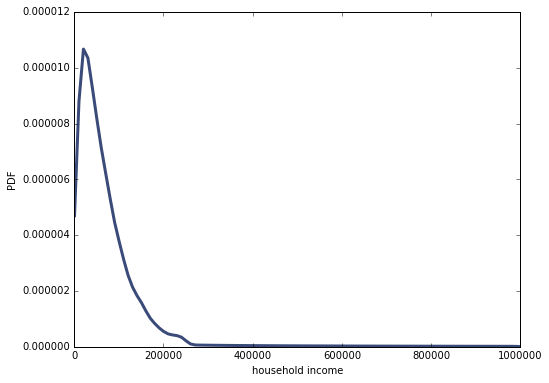

with log-upper 7


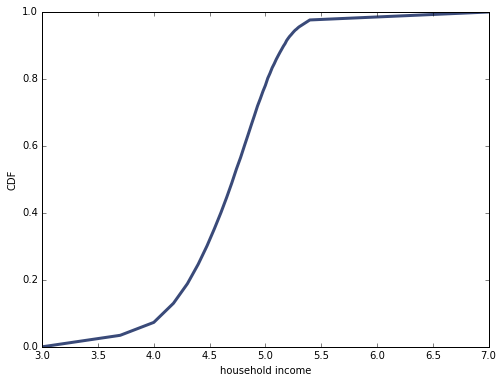

mean 124267.397222
std 559608.501374
median 51226.4544789
skewness 11.6036902675
pearson skewness 0.391564509277
cdf[mean] 0.856563066521


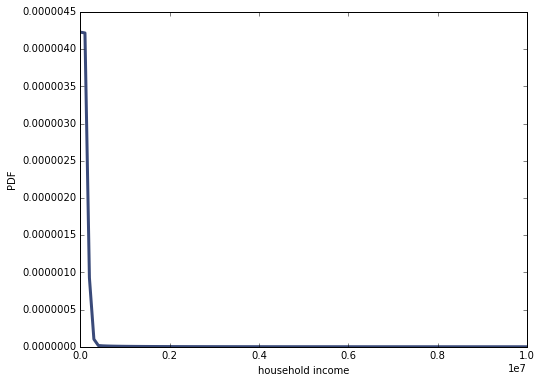

In [113]:
print("with log-upper 6")
main(6.0)
print("with log-upper 7")
main(7.0)